In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np
import torch
import csv
import os

/home/qiaodan/anaconda3/envs/standard38/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def smooth(tmp, l, epi_len):
#     assert l >= 1
#     if l == 1:
#         return tmp
    result = tmp.copy()
    for i in range(epi_len):
        result[..., i] = tmp[..., max(0, i-l+1):i+1].mean(axis=-1)

    return result



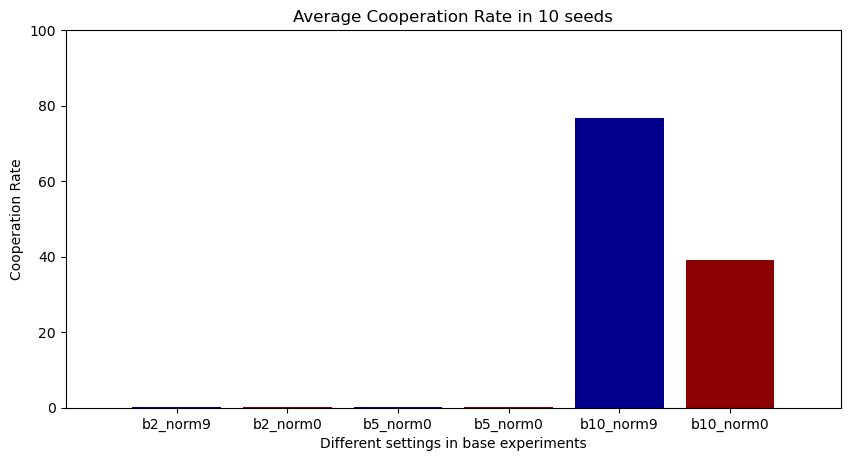

In [8]:
""" experiment 1, base case   """

c_rate = [0.268, 0.268, 0.2527, 0.268, 76.8, 39.2]
base_x = list(range(6))
base_label = ['b2_norm9', 'b2_norm0', 'b5_norm0', 'b5_norm0', 'b10_norm9', 'b10_norm0']

plt.figure(dpi=100, figsize=(10,5))
plt.bar(base_x, c_rate, color=('darkblue','darkred'))
# plt.hlines(ave_20seeds_corate, 0, 10, color='red')
plt.xticks(base_x, base_label)
plt.xlabel('Different settings in base experiments')
plt.ylabel('Cooperation Rate')
plt.title('Average Cooperation Rate in 10 seeds')
plt.savefig('./results/base/Average_cooperation_rate_in_b_2_5_10.png')
plt.axis([-1, 6, 0, 100])
plt.show()









In [ ]:
""" Experiment with seeding """
s3n9 = pd.read_csv('./results/seeding/exp_seed3_norm9.csv', header=None)
s2n9 = pd.read_csv('./results/seeding/exp_seed2_norm9.csv', header=None)
s1n9 = pd.read_csv('./results/seeding/exp_seed1_norm9.csv', header=None)
s0n9 = pd.read_csv('./results/seeding/exp_seed0_norm9.csv', header=None)

s2n0 = pd.read_csv('./results/seeding/exp_seed2_norm0.csv', header=None)
s1n0 = pd.read_csv('./results/seeding/exp_seed1_norm0.csv', header=None)
s0n0 = pd.read_csv('./results/seeding/exp_seed0_norm9.csv', header=None)

In [ ]:
s3n9_arr = np.array(s3n9)
s2n9_arr = np.array(s2n9)
s1n9_arr = np.array(s1n9)
s0n9_arr = np.array(s0n9)

s2n0_arr = np.array(s2n0)
s1n0_arr = np.array(s1n0)
s0n0_arr = np.array(s0n0)


s2n9.shape, s1n9.shape, s2n0.shape

In [ ]:
x_list = list(range(20000))
len(x_list)

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(x_list, s3n9_arr[1, :], color = 'lightskyblue')
#     plt.plot(x_list, smooth_s2n9[i, :], color = 'palegreen')
#     plt.plot(x_list, smooth_s1n9[i, :], color = 'lightcoral')
#     plt.plot(x_list, smooth_s0n9[i, :], color = 'violet')

In [ ]:
smooth_s3n9 = np.zeros((10, 20000))
smooth_s2n9 = np.zeros((10, 20000))
smooth_s1n9 = np.zeros((10, 20000))
smooth_s0n9 = np.zeros((10, 20000))


smooth_s2n0 = np.zeros((10, 20000))
smooth_s1n0 = np.zeros((10, 20000))
smooth_s0n0 = np.zeros((10, 20000))
for i in range(10):
    smooth_s3n9[i,:] = smooth(s3n9_arr[i,:], 500, 20000)
    smooth_s2n9[i,:] = smooth(s2n9_arr[i,:], 500, 20000)
    smooth_s1n9[i,:] = smooth(s1n9_arr[i,:], 500, 20000)
    smooth_s0n9[i,:] = smooth(s0n9_arr[i,:], 500, 20000)
    
    smooth_s2n0[i,:] = smooth(s2n0_arr[i,:], 500, 20000)
    smooth_s1n0[i,:] = smooth(s1n0_arr[i,:], 500, 20000)
    smooth_s0n0[i,:] = smooth(s0n0_arr[i,:], 500, 20000)
    
smooth_s2n9.shape

In [ ]:
# drop the unusual value
smooth_s1n9[7,:] = smooth_s1n9[6,:]
smooth_s0n9[3,:] = smooth_s0n9[2,:]
smooth_s0n0[3,:] = smooth_s0n0[2,:]

In [ ]:
mean_s3n9 = np.mean(smooth_s3n9, axis=0)
mean_s2n9 = np.mean(smooth_s2n9, axis=0)
mean_s1n9 = np.mean(smooth_s1n9, axis=0)
mean_s0n9 = np.mean(smooth_s0n9, axis=0)

mean_s2n0 = np.mean(smooth_s2n0, axis=0)
mean_s1n0 = np.mean(smooth_s1n0, axis=0)
mean_s0n0 = np.mean(smooth_s0n0, axis=0)


In [ ]:
plt.figure(figsize=(20, 14))
plt.subplot(211)
for i in range(10):
    plt.plot(x_list, smooth_s3n9[i, :], color = 'lightskyblue')
    plt.plot(x_list, smooth_s2n9[i, :], color = 'palegreen')
    plt.plot(x_list, smooth_s1n9[i, :], color = 'lightcoral')
    plt.plot(x_list, smooth_s0n9[i, :], color = 'violet')
plt.plot(x_list, mean_s3n9, color = 'steelblue', linewidth = 3, label='Seeding 30%')
plt.plot(x_list, mean_s2n9, color = 'seagreen', linewidth = 3, label='Seeding 20%')
plt.plot(x_list, mean_s1n9, color = 'darkred', linewidth = 3, label='Seeding 10%')
plt.plot(x_list, mean_s0n9, color = 'darkmagenta', linewidth = 3, label='Seeding 0%')
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('Rewards with seeding, norm 9, b = 5')
plt.axis([0, 20000, 0, 4])
plt.legend()

plt.subplot(212)
for i in range(10):
    plt.plot(x_list, smooth_s2n0[i, :], color = 'palegreen')
    plt.plot(x_list, smooth_s1n0[i, :], color = 'lightcoral')
    plt.plot(x_list, smooth_s0n0[i, :], color = 'violet')
plt.plot(x_list, mean_s2n0, color = 'seagreen', linewidth = 3, label='Seeding 20%')
plt.plot(x_list, mean_s1n0, color = 'darkred', linewidth = 3, label='Seeding 10%')
plt.plot(x_list, mean_s0n0, color = 'darkmagenta', linewidth = 3, label='Seeding 0%')
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('Rewards with seeding, norm 0, b = 5')
plt.axis([0, 20000, 0, 0.5])
plt.legend()

plt.savefig('/results/seeding/seeding_agents_to_promote_cooperation.png')

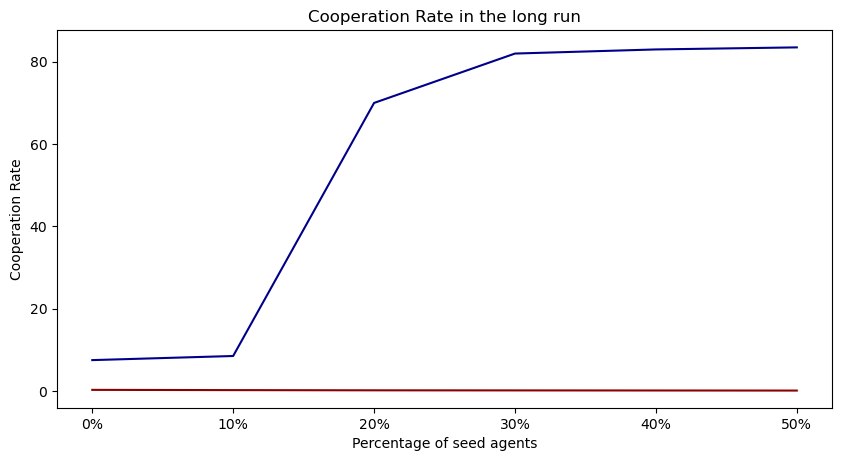

In [15]:
""" experiment summary, fig2 A, seeding case   """

norm9_rate = [7.5, 8.5, 70, 82, 83, 83.5]
norm0_rate = [0.27, 0.21, 0.16, 0.14, 0.12, 0.1]
seed_sum_x = list(range(6))
seed_sum_label = ['0%', '10%', '20%', '30%', '40%', '50%']

plt.figure(dpi=100, figsize=(10,5))
plt.plot(seed_sum_x, norm9_rate, color=('darkblue'))
plt.plot(seed_sum_x, norm0_rate, color=('darkred'))
plt.xticks(seed_sum_x, seed_sum_label)
plt.xlabel('Percentage of seed agents')
plt.ylabel('Cooperation Rate')
plt.title('Cooperation Rate in the long run')
# plt.axis([0, 5, 0, 85])
plt.savefig('./results/seeding/cooperation_rate_summary.png')
plt.show()



In [ ]:
"""intrinsic rewards results"""

In [58]:
"""mix k0 alpha0.6"""

mix_a6k0_n9 = np.array(pd.read_csv('./results/intrinsic/k0alpha6_sum.csv', header=None))
mix_a9_n9 = np.array(pd.read_csv('./results/intrinsic/alpha9/alpha9_sum.csv', header=None))
mix_a3_n9 = np.array(pd.read_csv('./results/intrinsic/alpha3/alpha3_sum.csv', header=None))

smooth_a6k0_reward = np.zeros((10, 100000))
smooth_a9_reward = np.zeros((10, 100000))
smooth_a3_reward = np.zeros((10, 100000))


for i in range(10):
    smooth_a6k0_reward[i,:] = smooth(mix_a6k0_n9[2*i,:], 1000, 100000)
    smooth_a9_reward[i,:] = smooth(mix_a9_n9[2*i,:], 1000, 100000)
    smooth_a3_reward[i,:] = smooth(mix_a3_n9[2*i,:], 1000, 100000)
    
    
mix_a6k0_n9.shape, smooth_a6k0_reward.shape, smooth_a9_reward.shape, smooth_a3_reward.shape

((20, 100000), (10, 100000), (10, 100000), (10, 100000))

In [66]:
mean_a6k0_reward = np.mean(smooth_a6k0_reward, axis=0)
mean_a9_reward = np.mean(smooth_a9_reward, axis=0)
mean_a3_reward = np.mean(smooth_a3_reward, axis=0)


np.mean(mean_a6k0_reward[-5000:]), np.mean(mean_a9_reward[-5000:]), np.mean(mean_a3_reward[-5000:])

(3.5003999758000006, 3.573817832, 3.4469701780000004)

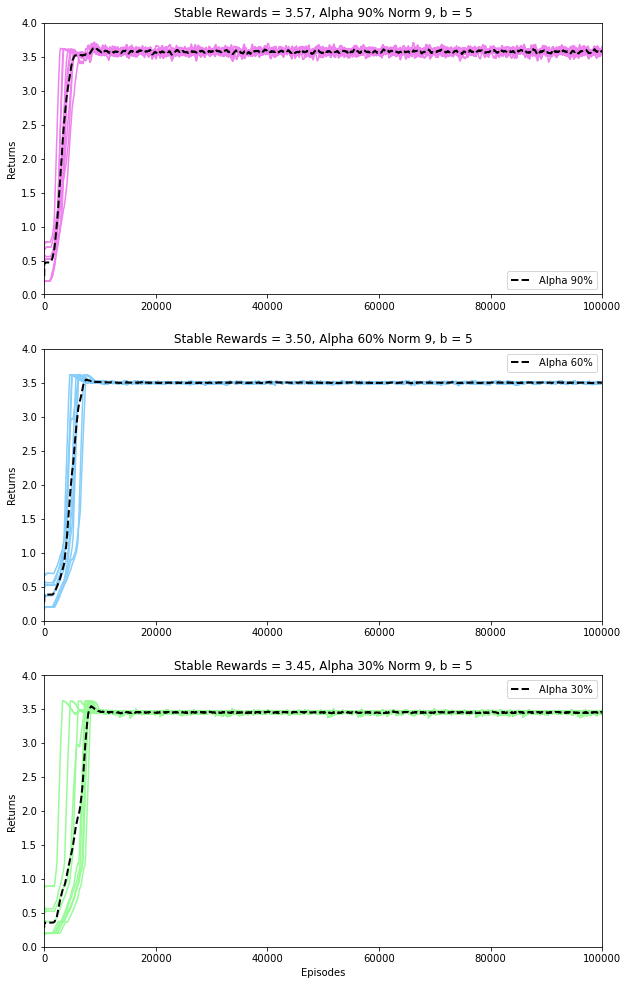

In [70]:
mix_list = list(range(100000))


plt.figure(figsize=(10, 17))
plt.subplot(311)
for i in range(10):
    plt.plot(mix_list, smooth_a9_reward[i, :], color = 'violet')
plt.plot(mix_list, mean_a9_reward, color = 'black', linewidth = 2, linestyle = '--', label='Alpha 90%')
# plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('Stable Rewards = 3.57, Alpha 90% Norm 9, b = 5')
plt.axis([0, 100000, 0, 4])
plt.legend()

plt.subplot(312)
for i in range(10):
    plt.plot(mix_list, smooth_a6k0_reward[i, :], color = 'lightskyblue')
plt.plot(mix_list, mean_a6k0_reward, color = 'black', linewidth = 2, linestyle = '--', label='Alpha 60%')
# plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('Stable Rewards = 3.50, Alpha 60% Norm 9, b = 5')
plt.axis([0, 100000, 0, 4])
plt.legend()

plt.subplot(313)
for i in range(10):
    plt.plot(mix_list, smooth_a3_reward[i, :], color = 'palegreen')
plt.plot(mix_list, mean_a3_reward, color = 'black', linewidth = 2, linestyle = '--', label='Alpha 30%')
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('Stable Rewards = 3.45, Alpha 30% Norm 9, b = 5')
plt.axis([0, 100000, 0, 4])
plt.legend()


plt.savefig('./results/intrinsic/alpha_sum.png')
plt.show()




In [73]:
height = 10
episodes_len = 20000

In [75]:
"""mix k1/5 alpha0.6"""

mix_a6k1_n9 = np.array(pd.read_csv('./results/mix/k1alpha6_sum.csv', header=None))
mix_a6k5_n9 = np.array(pd.read_csv('./results/mix/k5alpha6_sum.csv', header=None))


mix_a6k1_n9_reward = np.zeros((10, episodes_len))
mix_a6k1_n9_rate = np.zeros((10, episodes_len))
mix_a6k5_n9_reward = np.zeros((10, episodes_len))
mix_a6k5_n9_rate = np.zeros((10, episodes_len))
for i in range(10):
    mix_a6k1_n9_reward[i,:] = mix_a6k1_n9[2*i,:20000]
    mix_a6k1_n9_rate[i,:] = mix_a6k1_n9[2*i+1,:20000]
    mix_a6k5_n9_reward[i,:] = mix_a6k5_n9[2*i,:]
    mix_a6k5_n9_rate[i,:] = mix_a6k5_n9[2*i+1,:]
    
mix_a6k1_n9.shape, mix_a6k1_n9_reward.shape


((20, 100000), (10, 20000))

In [77]:
smooth_a6k1_reward = np.zeros((10, episodes_len))
smooth_a6k1_rate = np.zeros((10, episodes_len))
smooth_a6k5_reward = np.zeros((10, episodes_len))
smooth_a6k5_rate = np.zeros((10, episodes_len))
for i in range(height):
    smooth_a6k1_reward[i,:] = smooth(mix_a6k1_n9_reward[i,:], 1000, episodes_len)
    smooth_a6k1_rate[i,:] = smooth(mix_a6k1_n9_rate[i,:], 1000, episodes_len)
    smooth_a6k5_reward[i,:] = smooth(mix_a6k5_n9_reward[i,:], 1000, episodes_len)
    smooth_a6k5_rate[i,:] = smooth(mix_a6k5_n9_rate[i,:], 1000, episodes_len)

smooth_a6k1_reward.shape, smooth_a6k5_reward.shape

((10, 20000), (10, 20000))

In [78]:
mean_a6k1_reward = np.mean(smooth_a6k1_reward, axis=0)
mean_a6k1_rate = np.mean(smooth_a6k1_rate, axis=0)
mean_a6k5_reward = np.mean(smooth_a6k5_reward, axis=0)
mean_a6k5_rate = np.mean(smooth_a6k5_rate, axis=0)

In [88]:
np.mean(mean_a6k1_reward), np.mean(mean_a6k5_reward[-5000:])

(2.9529518618604103, 3.7245310877999995)

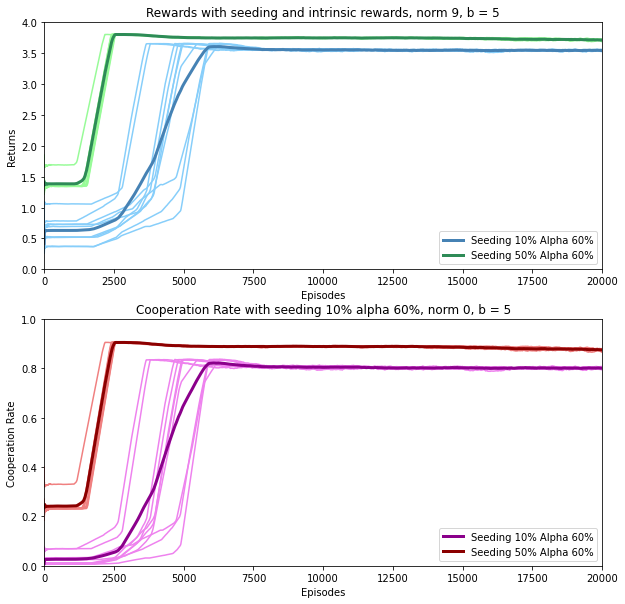

In [87]:
mix_list = list(range(20000))
plt.figure(figsize=(10, 10))
plt.subplot(211)
for i in range(10):
    plt.plot(mix_list, smooth_a6k1_reward[i, :], color = 'lightskyblue')
    plt.plot(mix_list, smooth_a6k5_reward[i, :], color = 'palegreen')

plt.plot(mix_list, mean_a6k1_reward, color = 'steelblue', linewidth = 3, label='Seeding 10% Alpha 60%')
plt.plot(mix_list, mean_a6k5_reward, color = 'seagreen', linewidth = 3, label='Seeding 50% Alpha 60%')

plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('Rewards with seeding and intrinsic rewards, norm 9, b = 5')
plt.axis([0, 20000, 0, 4])
plt.legend()

plt.subplot(212)
for i in range(10):
    plt.plot(mix_list, smooth_a6k1_rate[i, :], color = 'violet')
    plt.plot(mix_list, smooth_a6k5_rate[i, :], color = 'lightcoral')

plt.plot(mix_list, mean_a6k1_rate, color = 'darkmagenta', linewidth = 3, label='Seeding 10% Alpha 60%')
plt.plot(mix_list, mean_a6k5_rate, color = 'darkred', linewidth = 3, label='Seeding 50% Alpha 60%')

plt.xlabel('Episodes')
plt.ylabel('Cooperation Rate')
plt.title('Cooperation Rate with seeding 10% alpha 60%, norm 0, b = 5')
plt.axis([0, 20000, 0, 1])
plt.legend()
plt.savefig('./results/mix/alpha_and_seeding.png')
plt.show()



In [ ]:
"""Bottom-Up"""

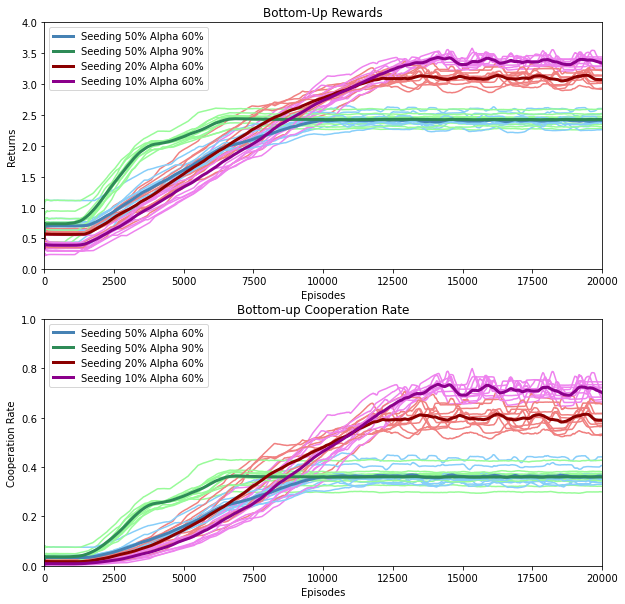

In [6]:
height = 10
episodes_len = 20000

"""mix k1/5 alpha0.6"""

bottomup = np.array(pd.read_csv('./results/bottomup/k5alpha6.csv', header=None))
bottomup_k2a6 = np.array(pd.read_csv('./results/bottomup/k2alpha6.csv', header=None))
bottomup_k1a6 = np.array(pd.read_csv('./results/bottomup/k1alpha6.csv', header=None))
bottomup_k5a9 = np.array(pd.read_csv('./results/bottomup/k5alpha9.csv', header=None))

bu_reward = np.zeros((10, episodes_len))
bu_rate = np.zeros((10, episodes_len))
bu_reward_k5a9 = np.zeros((10, episodes_len))
bu_rate_k5a9 = np.zeros((10, episodes_len))
bu_reward_k2a6 = np.zeros((10, episodes_len))
bu_rate_k2a6 = np.zeros((10, episodes_len))
bu_reward_k1a6 = np.zeros((10, episodes_len))
bu_rate_k1a6 = np.zeros((10, episodes_len))
for i in range(height):
    bu_reward[i,:] = bottomup[2*i,:20000]
    bu_rate[i,:] = bottomup[2*i+1,:20000]
    bu_reward_k5a9[i,:] = bottomup_k5a9[2*i,:20000]
    bu_rate_k5a9[i,:] = bottomup_k5a9[2*i+1,:20000]
    bu_reward_k2a6[i,:] = bottomup_k2a6[2*i,:20000]
    bu_rate_k2a6[i,:] = bottomup_k2a6[2*i+1,:20000]
    bu_reward_k1a6[i,:] = bottomup_k1a6[2*i,:20000]
    bu_rate_k1a6[i,:] = bottomup_k1a6[2*i+1,:20000]
    

    
smooth_reward = np.zeros((10, episodes_len))
smooth_rate = np.zeros((10, episodes_len))
smooth_reward_k5a9 = np.zeros((10, episodes_len))
smooth_rate_k5a9 = np.zeros((10, episodes_len))
smooth_reward_k2a6 = np.zeros((10, episodes_len))
smooth_rate_k2a6 = np.zeros((10, episodes_len))
smooth_reward_k1a6 = np.zeros((10, episodes_len))
smooth_rate_k1a6 = np.zeros((10, episodes_len))

for i in range(height):
    smooth_reward[i,:] = smooth(bu_reward[i,:], 1000, episodes_len)
    smooth_rate[i,:] = smooth(bu_rate[i,:], 1000, episodes_len)
    smooth_reward_k5a9[i,:] = smooth(bu_reward_k5a9[i,:], 1000, episodes_len)
    smooth_rate_k5a9[i,:] = smooth(bu_rate_k5a9[i,:], 1000, episodes_len)
    smooth_reward_k2a6[i,:] = smooth(bu_reward_k2a6[i,:], 1000, episodes_len)
    smooth_rate_k2a6[i,:] = smooth(bu_rate_k2a6[i,:], 1000, episodes_len)
    smooth_reward_k1a6[i,:] = smooth(bu_reward_k1a6[i,:], 1000, episodes_len)
    smooth_rate_k1a6[i,:] = smooth(bu_rate_k1a6[i,:], 1000, episodes_len)

mean_reward = np.mean(smooth_reward, axis=0)
mean_rate = np.mean(smooth_rate, axis=0)
mean_reward_k5a9 = np.mean(smooth_reward_k5a9, axis=0)
mean_rate_k5a9 = np.mean(smooth_rate_k5a9, axis=0)
mean_reward_k2a6 = np.mean(smooth_reward_k2a6, axis=0)
mean_rate_k2a6 = np.mean(smooth_rate_k2a6, axis=0)
mean_reward_k1a6 = np.mean(smooth_reward_k1a6, axis=0)
mean_rate_k1a6 = np.mean(smooth_rate_k1a6, axis=0)




bu_list = list(range(20000))
plt.figure(figsize=(10, 10))
plt.subplot(211)
for i in range(10):
    plt.plot(bu_list, smooth_reward[i, :], color = 'lightskyblue')
    plt.plot(bu_list, smooth_reward_k5a9[i, :], color = 'palegreen')
    plt.plot(bu_list, smooth_reward_k2a6[i, :], color = 'lightcoral')
    plt.plot(bu_list, smooth_reward_k1a6[i, :], color = 'violet')

plt.plot(bu_list, mean_reward, color = 'steelblue', linewidth = 3, label='Seeding 50% Alpha 60%')
plt.plot(bu_list, mean_reward_k5a9, color = 'seagreen', linewidth = 3, label='Seeding 50% Alpha 90%')
plt.plot(bu_list, mean_reward_k2a6, color = 'darkred', linewidth = 3, label='Seeding 20% Alpha 60%')
plt.plot(bu_list, mean_reward_k1a6, color = 'darkmagenta', linewidth = 3, label='Seeding 10% Alpha 60%')

plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('Bottom-Up Rewards')
plt.axis([0, 20000, 0, 4])
plt.legend()

plt.subplot(212)
for i in range(10):
    plt.plot(bu_list, smooth_rate[i, :], color = 'lightskyblue')
    plt.plot(bu_list, smooth_rate_k5a9[i, :], color = 'palegreen')
    plt.plot(bu_list, smooth_rate_k2a6[i, :], color = 'lightcoral')
    plt.plot(bu_list, smooth_rate_k1a6[i, :], color = 'violet')
    

plt.plot(bu_list, mean_rate, color = 'steelblue', linewidth = 3, label='Seeding 50% Alpha 60%')
plt.plot(bu_list, mean_rate_k5a9, color = 'seagreen', linewidth = 3, label='Seeding 50% Alpha 90%')
plt.plot(bu_list, mean_rate_k2a6, color = 'darkred', linewidth = 3, label='Seeding 20% Alpha 60%')
plt.plot(bu_list, mean_rate_k1a6, color = 'darkmagenta', linewidth = 3, label='Seeding 10% Alpha 60%')



plt.xlabel('Episodes')
plt.ylabel('Cooperation Rate')
plt.title('Bottom-up Cooperation Rate')
plt.axis([0, 20000, 0, 1])
plt.legend()
plt.savefig('./results/bottomup/60alpha_10seeding.png')
plt.show()




In [ ]:
tensor([[205.2472,   0.0000],
        [  0.0000, 204.8485]])
tensor([[348.9536, 350.1501],
        [344.5672, 349.8918]])
tensor([[347.6320, 348.5988],
        [343.9457, 348.5139]])
tensor([[350.0111, 350.6809],
        [346.5481, 350.6877]])
tensor([[349.6506, 350.6759],
        [345.4092, 350.6853]])
tensor([[348.7086, 349.5895],
        [345.3932, 349.3303]])
tensor([[348.6331, 349.2318],
        [345.4701, 349.3800]])
tensor([[347.5081, 348.5010],
        [344.8438, 348.4275]])
tensor([[347.8540, 348.8855],
        [345.0000, 348.7831]])
tensor([[349.5954, 350.9168],
        [346.7769, 350.7694]])
    
    
    
    


In [ ]:
tensor([[ 4584.8364,   237.1931],
        [ 9404.1338,   493.0547],
        [ 5041.8057,   260.6329],
        [24694.2402,  1275.1007]])
tensor([[ 2549.0498,   127.9025],
        [ 6943.9683,   358.5701],
        [ 4956.4028,   259.9083],
        [  840.8202, 15853.9189]])
tensor([[  220.1750,  4107.5620],
        [ 9040.9492,   474.0628],
        [ 7541.0063,   395.8304],
        [20944.2617,  1103.8368]])
tensor([[  170.5179,  3258.2805],
        [ 7795.4795,   408.3167],
        [ 7016.3696,   362.3058],
        [  896.7071, 17021.7090]])
tensor([[ 3040.8652,   154.7093],
        [ 7212.7583,   381.8039],
        [  319.8419,  6411.8789],
        [16354.0068,   865.2772]])
tensor([[ 3436.0559,   178.4950],
        [ 7524.0527,   398.3654],
        [  372.1878,  7110.9595],
        [17095.2812,   907.8653]])
tensor([[  151.7301,  2747.7590],
        [ 7031.3945,   361.8209],
        [  295.4400,  5647.1538],
        [16115.7598,   860.3334]])
tensor([[  216.6792,  3947.8259],
        [ 8324.0820,   451.4358],
        [ 7650.4775,   399.2908],
        [  975.8685, 18725.9961]])
tensor([[ 3796.4473,   196.0975],
        [ 7864.2510,   418.7668],
        [ 7581.6509,   389.6402],
        [18339.8320,   981.4222]])
tensor([[ 3797.0256,   202.2165],
        [ 7850.1270,   420.0354],
        [ 7493.8784,   401.4886],
        [  968.2142, 17756.3477]])